Многошаговый метод 3-го порядка:
\begin{align*}
    y_{n+2} = y_{n+1} + h \left(\frac{5}{12} f(x_{n+2}, y_{n+2}) + \frac{2}{3} f(x_{n+1}, y_{n+1}) - \frac{1}{12} f(x_n, y_n) \right)
\end{align*}
Зададим функции $f(x,u)$ и $f_u(x,u)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n = 10
f = lambda x, y: np.exp(x/2)*np.sqrt(y)
df = lambda x, y: np.exp(x/2)*0.5/np.sqrt(y)
x0, y0 = 0, 1
real_y = lambda x: np.exp(x)

* Условия порядка: метод имеет порядок аппроксимации $p$, если 
$$
\begin{align}
& \sum_{j = 0}^r a_j = 0 \\
& \sum_{j=0}^r \frac{1}{k!} j^k a_j = \sum_{j=0}^r \frac{1}{(k-1)!} j^{k-1}b_j, \; k = 1, \ldots, p
\end{align}
$$
$a_0 = 0, a_1 = -1, a_2 = 1$  
$b_0 = -\frac{1}{12}, b_1 = \frac{2}{3}, b_3 = \frac{5}{12}$  
$$\sum_{j = 0}^r a_j = 0 + (-1) + 1 = 0 \\
k=1: \sum_{j=0}^{r}\frac{1}{1!}j^1a_j=-1+2=1 = \sum_{j=0}^r \frac{1}{(1-1)!} j^{1-1}b_j = -\frac{1}{12} + \frac{2}{3} + \frac{5}{12} = 1 \\
k=2: \sum_{j=0}^{r}\frac{1}{2!}j^2a_j=\frac{1}{2}(-1+4)=1.5 = \sum_{j=0}^r \frac{1}{(2-1)!} j^{2-1}b_j \\ =  0\cdot\frac{-1}{12} + 1\cdot\frac{2}{3} + 2\cdot\frac{5}{12} = 1.5\\
k=3: \sum_{j=0}^{r}\frac{1}{3!}j^3a_j=\frac{1}{6}(-1+8)=\frac{7}{6} = \sum_{j=0}^r \frac{1}{(3-1)!} j^{3-1}b_j  = \frac{7}{6}\\
$$
Таким образом условия порядка выполнены.


In [2]:
def newthon(f, df, eps, x0):
    x1 = x0 - f(x0)/df(x0)
    while np.abs(x1-x0) > eps:
        x0 = x1
        x1 = x0 - f(x0)/df(x0)
    return x1

$y_0$ нам известно. Значениe $y_1$ найдем методом Рунге-Кутты 3-го порядка.
Метод Рунге-Кутты 3 порядка:  
$y_{n+1} = y_n + \frac{h}{6}(k_1 + 4k_2 + k_3)$  
$k_1=f(x_n, y_n)$  
$k_2=f(x_n+\frac{h}{2}, y_n+\frac{h}{2}k_1)$  
$k_3=f(x_n+h, y_n - hk_1 + 2hk_2)$   

In [3]:
def r_k(f, xn, yn, h):
    k1 = f(xn, yn)
    k2 = f(xn+h/2, yn+h/2*k1)
    k3 = f(xn+h, yn -h*k1 + 2*h*k2)
    return yn + h/6*(k1+4*k2+k3)

In [4]:
def solve_DE(f, df, x, x0, y0):
    y = np.zeros_like(x)
    h = x[1]-x[0]
    y[0] = y0
    y[1] = r_k(f, x0, y0, h)
    eps = h
    for i in range(len(y)-2):
        xn, xn1, xn2 = x[i:i+3]
        yn, yn1 = y[i:i+2]
        F = lambda yn2: yn1 + h*(5*f(xn2, yn2)+8*f(xn1, yn1) - f(xn, yn))/12-yn2
        dF = lambda yn2: h*5*df(xn2, yn2)-1       
        y[i+2] = newthon(F, dF, eps, y[i+1])
    return y

In [5]:
def get_error(real , calculated):
    return np.linalg.norm((real-calculated),np.infty)

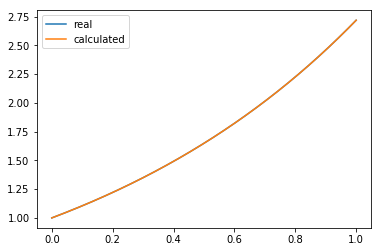

Text(0, 0.5, 'error')

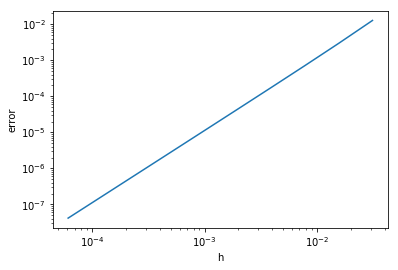

In [7]:
error = np.zeros((2, n))
for i in range(n):
    x = np.linspace(x0, x0+1, 2**(i+5)+1)
    y = solve_DE(f, df, x, x0, y0)
    error[0][i] = 1/(2**(i+5))
    error[1][i] = get_error(real_y(x), y)
plt.plot(x,real_y(x), label = 'real')
plt.plot(x,y, label = 'calculated')
plt.legend()
plt.show()
plt.loglog(error[0], error[1])
plt.xlabel('h')
plt.ylabel('error')